<a href="https://colab.research.google.com/github/JosephDonoso/ADA-Informes/blob/main/Informe_MaxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensayo <nombre>**

## **1. Problema:**
>Dado un arreglo de $n$ números se debe encontrar un subarreglo, con índices $i,j$ que cumplan $1\leq i\leq j\leq n$, cuya suma de los elementos sea la más grande que en cualquier otro subarreglo$[i...j]$ del mismo.

**Entrada**: Secuencia de $n$ números $[a_1,a_2,...,a_n]$ y los índices $low$ y $high$ que dan inicio y termino a la secuencia.

**Salida**: La máxima suma del subarreglo encontrado y los índices $i$ , $j$ correspondientes al comienzo y al término del subarreglo$[i...j]$.

Algunos de los campos donde se requiere esta clase de algoritmos es en el **análisis de secuencias genómicas** para encontrar regiones del ADN con alta carga de Guanina y Citosina, siendo las que contienen la mayor cantidad de genes heredables, por sus tres puentes de hidrógeno entre las bases nitrogenadas. Facilita por ejemplo verificar, entre las secuencias de máximas cargas obtenidas, cuales conllevan a enfermedades hereditarias o rasgos característicos del individuo.

Otro uso de estos algoritmos es en el desarrollo de la **visión por computadora**, en específico cuando una máquina requiere percibir, desde una matriz de bits de una imagen, la región más iluminada de esta y de esta forma estimar la forma 3D de un objeto por una imagen del mismo en 2D.

## **2. Subarreglo de suma máxima**

### **2.1. Descripción del algoritmo**
Se implementará un algoritmo para obtener el subarreglo de suma máxima que utiliza el paradigma divide y vencerás, fué creado por Michael Ian "Mike" Shamos.

El algoritmo esta conformado por 2 funciones, el MaxSubArray que se encarga de dividir el problema recursivamente hasta obtener subarreglos con elementos individuales y si uno de estos elementos por sí solo es la máxima suma, el algoritmo se encargará de retornarlo en cada recursión hasta acabar la función. Ademas de dividir el subproblema por la mitad, cada ramificación del arbol será entregada a MaxSubArrayMid que buscará la máxima suma de esa rama de números, evaluando desde la mitad hasta el comienzo de la secuencia y desde la mitad hasta el final de la secuencia para sumar sus resultados y "concatenar"(conectar índices encontrados) los subarreglos de sumas maximas situados en cada lado.

Se evaluará el MaxSubArrayMid en cada nodo del árbol para hallar subarreglos de más de un número que retornen la mayor suma, mientras que la propia función MaxSubArray evaluará los elementos individuales del arreglo.

MaxSubArrayMid funciona de la siguiente forma, recibe un índice del comienzo, del final y de la mitad del subarreglo dado, comienza a iterar desde la mitad hasta el índice del comienzo para sumar cada número, y cuando encuentra una nueva suma mayor, guarda el índice de esa posición y el valor de la suma en variables que llamaremos **indice_izq** y **sum_izq**. Luego realiza el mismo procedimiento de antes, iterando desde la mitad + 1 hasta el índice del final, obteniendo las variables **indice_der**, **sum_der**. Finalmente se suman los dos valores calculados para la suma total a retornar y el subarreglo resultante es desde **indice_izq** hasta **indice_der**.

### **2.2. Implementación del algoritmo**

In [11]:
import random
from numpy import inf
from termcolor import colored
import datetime
from timeit import repeat
from copy import deepcopy

In [3]:
#Función MaxSubArrayMid
def MaxSubArrayMid(A, low, mid, high, verbose, operaciones):
  sum_izq = -inf
  sum = 0
  for i in range(mid, low-1, -1): #Recorre de la mitad al comienzo buscando la máxima suma
    operaciones += 1
    sum += A[i]
    if sum > sum_izq:
      sum_izq = sum
      indice_izq = i

  sum_der = -inf
  sum = 0
  for i in range(mid + 1, high + 1): #Recorre de la mitad + 1 al final buscando la máxima suma
    operaciones += 1
    sum += A[i]
    if sum > sum_der:
      sum_der = sum
      indice_der = i


  return indice_izq, indice_der, sum_izq + sum_der, operaciones

In [4]:
#Función MaxSubArray
def MaxSubArray(A, low, high, verbose = False, operaciones = 0):
  if low == high:
    return low, high, A[low], operaciones #Si es solo un elemento retorno el valor
  mid = (low+high) // 2

  if (verbose):
    print("Llamado a MaxSubArray con arreglos:")
    print("COMPLETO = ", colored(f"{str(A[low : high+1])[1:-1]}","blue"))
    print("   L     = ", colored(f"{str(A[low : mid+1])[1:-1]}","red"), "\b,", str(A[mid+1 : high+1])[1:-1])
    print("   R     = ", str(A[low : mid+1])[1:-1], "\b,", colored(f"{str(A[mid+1 : high+1])[1:-1]}","yellow"))
    
  izq_low, izq_high, izq_sum, operaciones = MaxSubArray(A, low, mid, verbose, operaciones) #Llamado a la función con la rama izquierda
  der_low, der_high, der_sum, operaciones = MaxSubArray(A, mid+1, high, verbose, operaciones) #Llamado a la función con la rama derecha
  mid_low, mid_high, mid_sum, operaciones = MaxSubArrayMid(A, low, mid, high, verbose, operaciones) #Validar si el subarreglo máximo está en el nodo actual

  if(verbose):
    print("Subarreglo a evaluar:")
    if(low == 0):
      print( colored(f"{str(A[low : high+1])[1:-1]}","blue"), "\b,", str(A[high+1 : ])[1:-1])
    elif(high == len(A)-1):
      print( str(A[ : low])[1:-1], "\b,", colored(f"{str(A[low : high+1])[1:-1]}","blue"))
    else:
      print( str(A[ : low])[1:-1], "\b,", colored(f"{str(A[low : high+1])[1:-1]}","blue"), "\b,", str(A[high+1 : ])[1:-1])


  if (izq_sum >= der_sum and izq_sum >= mid_sum): #Retornar el subarreglo izquierdo si es el de mayor suma
    
    if (verbose):
      print("Max_L = ", colored(f"{str(A[izq_low : izq_high+1])}","red"), "Suma =", colored(f"{str(izq_sum)}","green"))
      print("Max_M = ", colored(f"{str(A[mid_low : mid_high+1])}","blue"), "Suma =", mid_sum)
      print("Max_R = ", colored(f"{str(A[der_low : der_high+1])}","yellow"), "Suma =", der_sum, "\n")

    return izq_low, izq_high, izq_sum, operaciones
  elif (der_sum >= izq_sum and der_sum >= mid_sum): #Retornar el subarreglo derecho si es el de mayor suma

    if (verbose):
      print("Max_L = ", colored(f"{str(A[izq_low : izq_high+1])}","red"), "Suma =", izq_sum)
      print("Max_M = ", colored(f"{str(A[mid_low : mid_high+1])}","blue"), "Suma =", mid_sum)
      print("Max_R = ", colored(f"{str(A[der_low : der_high+1])}","yellow"), "Suma =", colored(f"{str(der_sum)}","green"), "\n")

    return der_low, der_high, der_sum, operaciones
  else:                                           #Retornar el subarreglo medio si es el de mayor suma

    if (verbose):
      print("Max_L = ", colored(f"{str(A[izq_low : izq_high+1])}","red"), "Suma =", izq_sum, )
      print("Max_M = ", colored(f"{str(A[mid_low : mid_high+1])}","blue"), "Suma =", colored(f"{str(mid_sum)}","green"))
      print("Max_R = ", colored(f"{str(A[der_low : der_high+1])}","yellow"), "Suma =", der_sum, "\n")

    return mid_low, mid_high, mid_sum, operaciones



In [5]:
A = [-1,-2,4,-5,5,-1,3,1]
low,high,sumTotal,op = MaxSubArray(A, 0, len(A)-1)
print("La suma total es:", sumTotal)
print("El subarreglo es:", A[low:high+1])
print("Número de comparaciones:", op)


La suma total es: 8
El subarreglo es: [5, -1, 3, 1]
Número de comparaciones: 24


### **2.3. Ejemplo**
Considerando el arreglo:

$A=[1,-2,4,-5]$ 

1.- En el primer llamado a MaxSubArray

Subdividirá el arreglo original en 2:

$L = [1,-2]$ y $R = [4,-5]$

2.- Se llamará denuevo a MaxSubArray

Subdividirá el arreglo de la izquierda en 2:

$L' = [1]$ y $R' = [-2]$

3.- En el anterior llamado se retornó $L'$ y $R'$ como máximas sumas:

Max suma de $L'$ = $1$ 

Max suma de $R'$ = $-2$

Y se compara con la suma máxima del arreglo $L = [1,-2]$ (retornada de MaxSubArrayMid)

Max suma de $L$ = $-1$

4.- En vista de que Max suma de $L' = [1]$ es la mayor,

Se retornará para compararse con la máxima suma de $R = [4,-5]$

Que puede ser Max suma izquierda = $4$ ,

Max suma mitad = $-1$ ó

Max suma derecha = $-5$.

5.- Retornando Max suma izquierda = $4$ que es la mayor, la llamaremos

$R'' = [4]$

6.- Como últimas comparaciones se encuentran:

$L' = [1]$ y Max suma = $1$

$R'' = [4]$ y Max suma = $4$

Y MaxSubArrayMid de $A=[1,-2,4,-5]$

Con suma máxima = $3$ y subarreglo $A' = [1,-2,4]$

Retornando como resultado el subarreglo $R'' = [4]$

Y suma máxima = $4$

A continuación se mostrará una representación del ejemplo:

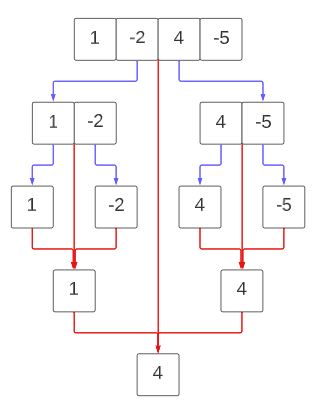

### **2.4. Ejecución paso a paso (Verbose = True)**

In [6]:
A = [1,-2,4,-5]
sum = 0
low, high, sumTotal, op = MaxSubArray(A, 0, len(A)-1, True)
print("\nLa suma total es:", colored(f"{str(sumTotal)}","green"))
print("El subarreglo es:", A[low:high+1])

Llamado a MaxSubArray con arreglos:
COMPLETO =  1, -2, 4, -5
   L     =  1, -2 , 4, -5
   R     =  1, -2 , 4, -5
Llamado a MaxSubArray con arreglos:
COMPLETO =  1, -2
   L     =  1 , -2
   R     =  1 , -2
Subarreglo a evaluar:
1, -2 , 4, -5
Max_L =  [1] Suma = 1
Max_M =  [1, -2] Suma = -1
Max_R =  [-2] Suma = -2 

Llamado a MaxSubArray con arreglos:
COMPLETO =  4, -5
   L     =  4 , -5
   R     =  4 , -5
Subarreglo a evaluar:
1, -2 , 4, -5
Max_L =  [4] Suma = 4
Max_M =  [4, -5] Suma = -1
Max_R =  [-5] Suma = -5 

Subarreglo a evaluar:
1, -2, 4, -5 , 
Max_L =  [1] Suma = 1
Max_M =  [1, -2, 4] Suma = 3
Max_R =  [4] Suma = 4 


La suma total es: 4
El subarreglo es: [4]


## **4. Correctitud**

### **4.1. Teorema 1 (Correctitud de la función MaxSubArrayMid)**
*Dado un arreglo de $n$ elementos, el algoritmo ***MaxSubArrayMid*** retorna la máxima suma encontrada en el subarreglo de la mitad hasta el comienza, más la máxima suma del subarreglo desde la mitad + 1 hasta el final del arreglo.*

#### **Propiedad invariante de bucle**
Dado a que existen 2 bucles distintos con la misma funcionalidad, se describirá la propiedad solo para uno de ellos, en específico el bucle que comienza desde la mitad del arreglo hasta el indice $0$
>Al comienzo de cada iteración $i$, se realizó la suma de $i-1$ elementos contenidos en el subarreglo $A[...]$ desde el indice en la mitad $mid$ hasta $0$, y una cantidad de $i-1$ comparaciones con la máxima suma encontrada en las iteraciones anteriores a $i$.

Para el bucle de la mitad derecha del arreglo, las diferencias que existen son en el rango del subarreglo, ya que comenzaría a sumar desde $mid+1$ hasta el largo del arreglo $n$.

#### **Inicialización**
Al comenzar la iteración $i = 1$, se han realizado $i-1=0$ sumas de elementos contenidos en la mitad derecha del arreglo $A$ y dado a que no se han realizado comparaciones antes ($i-1 = 0$ comparaciones), la máxima suma debe ser igual a menos infinito, por lo que al terminar la iteración y obtener la suma de esa iteración, la primera comparación dejará a ese elemento inicial como la máxima suma.

#### **Mantención**
En la **$i$-ésima** iteración $i$, se han realizado un total de $i - 1 = n$ sumas y $n$ comparaciones con la máxima suma encontrada en las iteraciones anteriores a $i$, por lo que al terminar esta iteración, la sumatoria actual $sumI$ sumará un nuevo elemento que se comparará con la máxima suma $maxSum$ obtenida hasta el momento, si la $SumI$ es mayor a $maxSum$, $maxSum$ se actualizará a $SumI$, si es al contrario no se actualizará $maxSum$. Cuando finalize la última iteración con $i = largo/2$, se habrán realizado sumas y comparaciones para todos los elementos del subarreglo izquierdo de $A$ y $maxSum$ ya será lo máximo posible que puede ser, para finalmente ser retornada, lo que comprueba la correctitud del primer ciclo for, del segundo y de toda la función MaxSubArrayMid.

### **4.2. Teorema 2 (Correctitud de la función MaxSubArray)**

*Dado un arreglo de $n$ números, el algoritmo **MaxSubArray** retorna los índices $i,j$ que cumplan $1\leq i\leq j\leq n$, cuya suma de los elementos sea la más grande que en cualquier otro subarreglo$[i...j]$ del mismo, además del valor de esa suma.*

#### **Por inducción matemática**
>Probar $P(n)$ para un caso base.
>
>Probar que si $P(n)$ es cierto, entonces $P(n+1)$ también lo es.

Para el caso base $P(1)$, MaxSubArray retornará el arreglo de largo $n = 1$, el cual contendrá la suma máxima del arreglo por ser un solo elemento, además del índice de posición de ese elemento.
Para un problema $P(n)$, lo que ocurrirá es que en un posterior llamado a MaxSubArray este resolverá problemas $P(n/2)$, posteriormente $P(n/4)$ y así sucesivamente hasta tener muchos problemas en el caso base $P(1)$, donde se cumple que en los subarreglos de $n=1$ la máxima suma es el valor de ese elemento individual, retornando su posición y valor. Si el problema es $P(k)$ con $k < n$, ocurrirá que se dividirá $k$ en 2 como ocurrió con $n$ hasta llegar nuevamente a $P(1)$.

Como se detalló anteriormente se cumple que el algoritmo es correcto para $P(n)$ y todo $P(k)$ con $k < n$. Lo que ocurrirá con un $P(n+1)$ es que, en el próximo llamado recursivo de MaxSubArray, generará problemas $P((n+1)/2)$. Donde se observará que $\frac{n+1}{2} < n$ , entonces se comprueba que para $P(n+1)$ en próximos llamados a MaxSubArray ocurrirá igual que con $P(n)$, entregando el valor de un elemento y su posición para luego comparar su valor con otros elementos individuales y con la máxima suma de una combinación de elementos entregada por MaxSubArrayMid, que ya fué evaluada como correcta. Por lo que se comprueba que es correcta la función.

## **3. Tiempo de ejecución**




#### **Teorema (Tiempo de ejecución)**.
>*El algoritmno **MaxSubArray** tiene un tiempo de ejecución $O(nlog(n))$ en el peor caso.*

### **Prueba del Teorema usando árbol de recurrencia**
Para realizar el árbol de recurrencia debemos primeramente modelar el comportamiento del árbol con su función recursiva, esto se realiza con tres pasos.
#### **Divide:**
La complejidad temporal del algoritmo cuando divide el arreglo en dos hasta llegar a un elemento es constatnte, de $Θ(1)$.
#### **Conquista:**
La complejidad del problema original $T(n)$, recursivamente se divide en 2 subproblemas de tamaño $n/2$, es decir, $2T(n/2)$.
#### **Combina:**
Finalmente la función MaxSubArrayMid suma cada elemento del nodo del árbol para encontrar la máxima suma, con una complejidad igual al número de elementos $n$, complejidad de $Θ(n)$.

**Obtenemos:** 

$T(n) = \begin{cases} Θ(1) & \text{Si } n = 1 \\ 2T(n/2) + Θ(n) & \text{Si } n > 1 \end{cases}$

**Reescribiendo:**

$T(n) = \begin{cases} c & \text{Si } n = 1 \\ 2T(n/2) + cn & \text{Si } n > 1 \end{cases}$

Entonces, según la función, el problema comienza siendo $T(n)$ y para la segunda recursión se deja atras una complejidad de $cn$, realizamos otra recursión sobre los $2T(n/2)$ como ramificaciones de un árbol, por cada uno de los subproblemas se deja atras una complejidad de $cn/2$, que en total suman $cn$ ($cn/2 + cn/2 = cn$), y otros dos pares de $T(n/4)$. Se realizan recursiones hasta que n sea igual a 1, lo que ocurrirá en $log_2(n)$ recursiones y por cada una se dejó atras una complejidad de $cn$, más el final de toda rama que tiene complejidad $c$ con una cantidad de $n$ nodos, el algoritmo tiene un costo total de $cn(log_2(n)) +cn$, complejidad de $Θ(n(log(n))$. *Se puede observar que la complejidad es igual sin importar el orden de los elementos.*

### **Ejemplo**
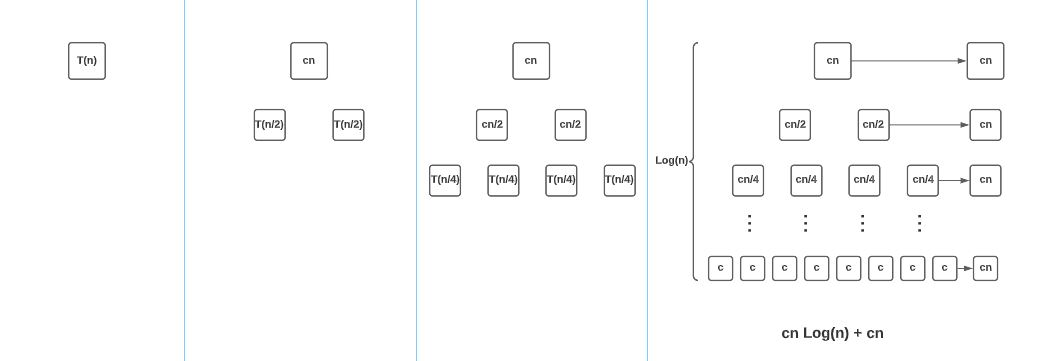

### **Prueba del Teorema usando el "Teorema maestro"**
La fórmula del **Teorema maestro** para resolver recurrencias de la forma:

$T(n) \leq aT(n/b)+O(n^d)$ , con $a \geq 1$, $b > 1$ y $d \geq 0$ 

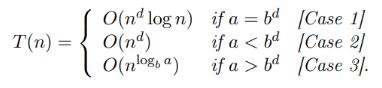

Para la función recursiva $2T(n/2) + O(n)$ calculada anteriormente, reemplazamos los valores $a = 2$, $b = 2$ y $d = 1$
y obtenemos como cota superior $O(nlog(n))$.

### **Prueba del Teorema usando el método de sustitución**.
Para ello debemos probar que $T(n)\leq dnlog(n)$, para algún valor de $d>0$.

**Reemplazamos:**

$T(n) = 2 d\frac{n}{2} log(\frac{n}{2}) + O(n)$

Reemplazamos $O(n)$ por $cn$. Luego, por definición de la notación $O$, sabemos que para $n$ suficientemente grande existe una constante $c$ tal que:

$T(n)\leq 2 d\frac{n}{2} log(\frac{n}{2}) + cn$

Desarrollando la inecuación:

$T(n)\leq dnlog(\frac{n}{2}) + cn \leq dnlog(n)$, para $d\geq\frac{c}{log(2)}$

Por lo que efectivamente $dnlog(n)=O(nlog(n))$ es una cota superior para el algoritmo.

## **5. Experimentos**

### **5.1. Complejidad temporal del algoritmo** (Experimento extra)
**Se intentará comprobar el mejor y peor caso**. Teóricamente llegamos a la conclusión en la sección anterior de que una cota superior para el algoritmo es $O(nlog(n))$ y se evaluará la cota con las comparaciones en casos experimentales.

Para los arreglos experimentales se usarán las siguientes secuencias.

Las secuencias de entrada son:
*   Negativos: La secuencia será un arreglo ordenado de $-1$ hasta $-n$.
*   Positivos: La secuencia será un arreglo ordenado de $1$ hasta $n$.
*   Caso aleatorio: La secuencia será un arreglo aleatorio de números entre 1 y 99, con $n$ cantidad de elementos.
*   Caso teórico: Secuencia para calcular aproximadamente las operaciones del algoritmo, esta se rige por la fórmula $n*log2(n)$.

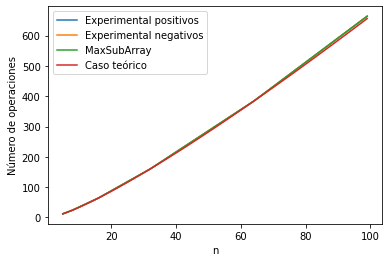

In [10]:
import matplotlib.pyplot as plt
import math

x=[n for n in range(5,100)]
y_teo = [n * math.log2(n) for n in range(5,100)] #usando la fórmula descrita en la sección de tiempo de ejecución
y_positivo = []
y_negativo = []
y_Max = []

for n in range(5,100):
  negativo = list(range(-1, -1*n-1 , -1))
  low, high, sumTotal, op = MaxSubArray(negativo, 0, len(negativo)-1 ) #rango de negativos con n elementos
  y_negativo.append(op)

  positivo = list(range(1, n+1))
  low, high, sumTotal, op = MaxSubArray(positivo, 0, len(positivo)-1) #rango de positivos con n elementos
  y_positivo.append(op)

  a = random.sample(range(1, 100), n) # n elementos con valores aleatorios
  low, high, sumTotal, op = MaxSubArray(a, 0, len(a)-1)
  y_Max.append(op)


plt.plot(x,y_positivo)
plt.plot(x,y_negativo)
plt.plot(x,y_Max)
plt.plot(x,y_teo)
plt.legend(["Experimental positivos", "Experimental negativos", "MaxSubArray", "Caso teórico"])

plt.xlabel('n')
plt.ylabel('Número de operaciones')
plt.show()

#### **Análisis de resultados**
Se observa que efectivamente $O(nlog(n))$ es una cota superior para el algoritmo, pero además de eso, independiente de casos positivos, negativos o aleatorios, siempre se obtiene el mismo número de operaciones, por lo que se puede concluir que independiente a qué elementos tenga el arreglo de entrada, las operaciones serán las mismas, solo depende del número de elementos que este tenga, es decir, no existe un mejor ni peor caso, lo que significa que la cota superior $O(n log(n))$ es también una inferior y quedaría de esta forma $Θ(nlog(n))$.

### **5.2. Compararción de la implementación recursiva "MaxSubArray" con el "Algoritmo de Kadane".**
La complejidad temporal del algoritmo de Kadane es $O(n)$ y no requiere ningún espacio adicional, donde n es el tamaño de la entrada.

In [14]:
#Algoritmo de Kadane
def kadane(A):
    # almacena la sublista de suma máxima encontrada hasta el momento
    max_so_far = 0
 
    # almacena la suma máxima de la sublista que termina en la posición actual
    max_ending_here = 0
 
    # recorrer la lista dada
    for i in A:
        # actualice la suma máxima de la sublista "finalizando" en el índice `i` (agregando el
        # elemento actual a la suma máxima que termina en el índice anterior `i-1`)
        max_ending_here = max_ending_here + i
 
        # si la suma máxima es negativa, configúrelo en 0 (lo que representa
        # una sublista vacía)
        max_ending_here = max(max_ending_here, 0)
 
        # actualiza el resultado si se encuentra que la suma de la sublista actual es mayor
        max_so_far = max(max_so_far, max_ending_here)
 
    return max_so_far

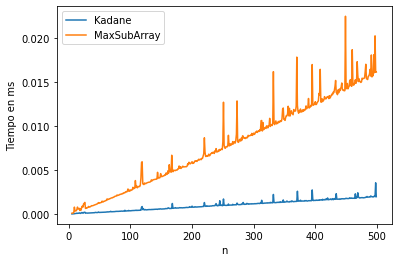

In [17]:
x=[]
y_kadane = []
y_MaxSubArray = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  b = deepcopy(a)

  #la función repeat está ejecutando 20 veces kadane con el arreglo a y retorna el mejor tiempo obtenido.
  t_kadane = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces MaxSubArray con el arreglo b y retorna el mejor tiempo obtenido.
  t_maxSubArray = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({b},{0},{len(b)-1})", repeat=1, number=10)

  x.append(n)
  y_kadane.append(t_kadane)
  y_MaxSubArray.append(t_maxSubArray)


plt.plot(x,y_kadane)
plt.plot(x,y_MaxSubArray)
plt.legend(["Kadane", "MaxSubArray"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### **Análisis de resultados**
Se puede observar que cuando comparamos el tiempo de ejecución en ambos algoritmos se cumple que el algoritmo recursivo tiene complejidad $Θ(nlog(n))$, mientras que el de Kadane tiene una complejidad lineal $O(n)$, por lo que es más óptima la utilización de este último. Los peaks en el tiempo de ejecución son producto de los procedimientos externos realizados por el entorno de ejecución.

### **5.3. Compararción de la implementación recursiva "MaxSubArray" con una implementación a "fuerza bruta"**
La complejidad temporal para el método de fuerza bruta es $O(n^2)$ debido a que recorre con un doble ciclo for el arreglo completo. 

In [24]:
#Método a fuerza bruta
def MaxSubArrayFB(array):
  maximum = 0
  for i in range(0, len(array)):
    current = 0
    for j in range(0, len(array)):
       current += array[j]
       if current > maximum:
         maximum = current
  return maximum

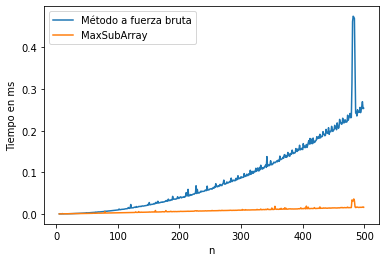

In [27]:
x=[]
y_fuerzaBruta = []
y_MaxSubArray = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  b = deepcopy(a)

  #la función repeat está ejecutando 20 veces MaxSubArrayFB con el arreglo a y retorna el mejor tiempo obtenido.
  t_fuerzaBruta = repeat(setup="from __main__ import MaxSubArrayFB", stmt=f"MaxSubArrayFB({a})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces MaxSubArray con el arreglo b y retorna el mejor tiempo obtenido.
  t_maxSubArray = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({b},{0},{len(b)-1})", repeat=1, number=10)

  x.append(n)
  y_fuerzaBruta.append(t_fuerzaBruta)
  y_MaxSubArray.append(t_maxSubArray)


plt.plot(x,y_fuerzaBruta)
plt.plot(x,y_MaxSubArray)
plt.legend(["Método a fuerza bruta", "MaxSubArray"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### **Análisis de resultados**
En complejidad temporal, es más eficiente en tiempo el método recursivo para arreglos con gran cantidad de datos siguiendo una cota asintótica de $O(n(log(n))$ , ya que el método a fuerza bruta sigue una cota $O(n^2)$ que crece con mayor rapidez representadas perfectamente con el tiempo de ejecución del gráfico. Los peaks en el tiempo de ejecución son producto de los procedimientos externos realizados por el entorno de ejecución.

### **5.4. Compararción de las 3 implementaciónes**

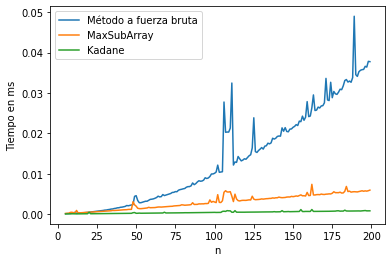

In [32]:
x=[]
y_fuerzaBruta = []
y_MaxSubArray = []
y_kadane = []

for n in range(5,200):

  a = random.sample(range(1, 1000), n)
  b = deepcopy(a)
  c = deepcopy(a)

  #la función repeat está ejecutando 20 veces MaxSubArrayFB con el arreglo a y retorna el mejor tiempo obtenido.
  t_fuerzaBruta = repeat(setup="from __main__ import MaxSubArrayFB", stmt=f"MaxSubArrayFB({a})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces MaxSubArray con el arreglo b y retorna el mejor tiempo obtenido.
  t_maxSubArray = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({b},{0},{len(b)-1})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces kadane con el arreglo a y retorna el mejor tiempo obtenido.
  t_kadane = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)

  x.append(n)
  y_fuerzaBruta.append(t_fuerzaBruta)
  y_MaxSubArray.append(t_maxSubArray)
  y_kadane.append(t_kadane)


plt.plot(x,y_fuerzaBruta)
plt.plot(x,y_MaxSubArray)
plt.plot(x,y_kadane)
plt.legend(["Método a fuerza bruta", "MaxSubArray","Kadane"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### **Análisis de resultados**
De los 3 algoritmos, el de Kadane es el más eficiente en tiempo de ejecución $O(n)$, luego viene el método recursivo con $O(nlog(n))$ y por último el método a fuerza bruta $O(n^2)$ que claramente se ven representados en el gráfico por la velocidad con la que crecen las funciones.